In [47]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
import rlway.osrd.infra as infr
import matplotlib.pyplot as plt

In [49]:
infra, sim, res = infr.read_jsons_in_dir('.')

In [50]:
from rlway.schedules import Schedule, schedule_from_simulation

['rt.DA1->DA_out', 'rt.buffer_stop.0->DA1', 'rt.DA2->DA_out', 'rt.buffer_stop.1->DA2', 'rt.DA_out->D0', 'rt.D0->D1', 'rt.D1->D2', 'rt.D2->D3', 'rt.D3->D4', 'rt.D4->D5', 'rt.D5->D6', 'rt.D6->D7', 'rt.D7->D8', 'rt.D8->DB_in', 'rt.DB_in->DB2', 'rt.DB_in->DB1', 'rt.DB1->buffer_stop.2', 'rt.DB2->buffer_stop.3', 'rt.DS1->D5', 'rt.buffer_stop.4->DS1']


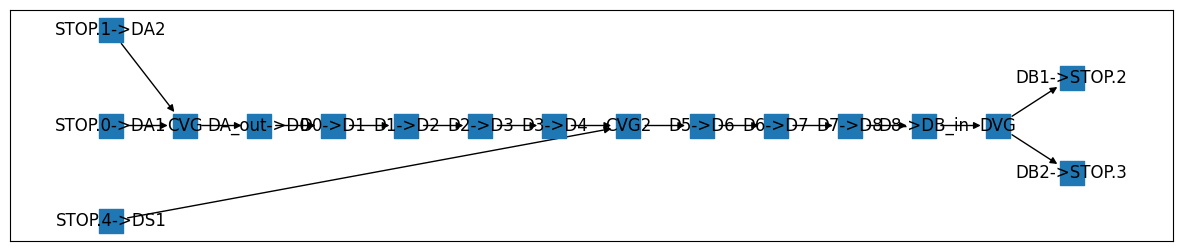

In [51]:
s = schedule_from_simulation(infra, res, simplify_route_names=True)
plt.figure(figsize=(15,3))
s.draw_graph()

In [52]:
infr.draw_infra(infra)

In [53]:
# s = s.sort()

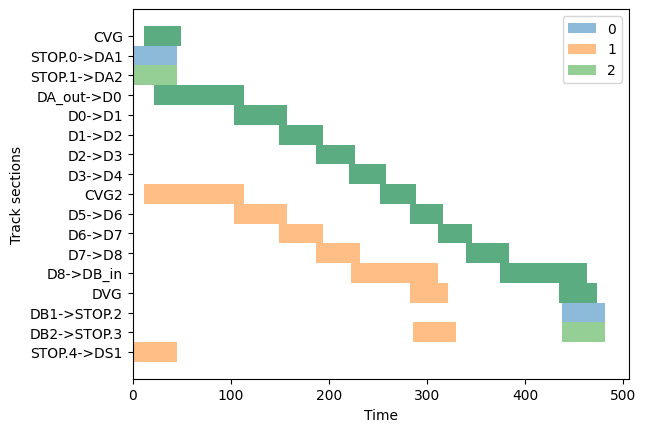

In [54]:
s.plot()


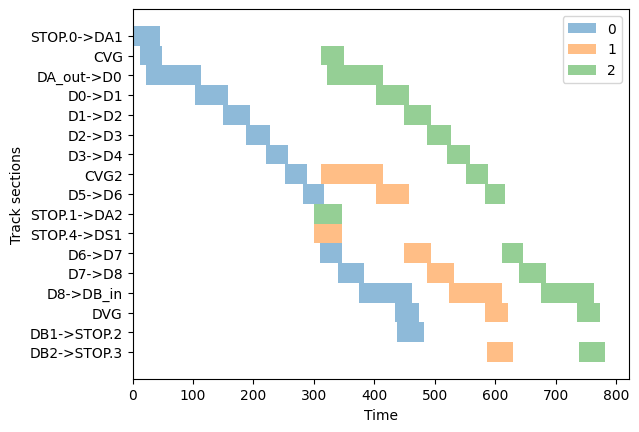

In [55]:
s.shift_train_departure(1, 300).shift_train_departure(2, 300).sort().plot()

Text(0, 0.5, 'Position')

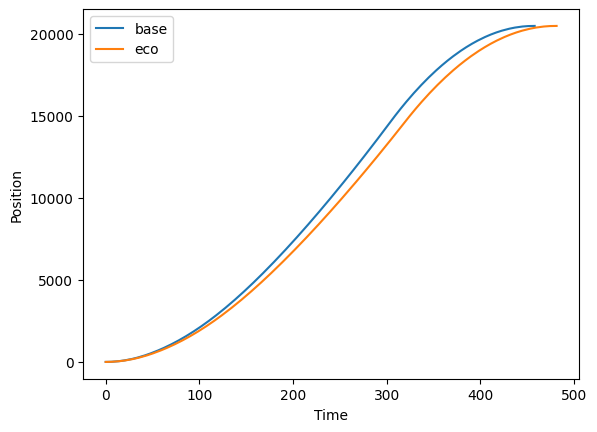

In [56]:
base_head_positions = res[0]['base_simulations'][0]['head_positions']
eco_head_positions = res[0]['eco_simulations'][0]['head_positions']

t_base = [dict['time'] for dict in base_head_positions]
y_base = [dict['path_offset'] for dict in base_head_positions]
t_eco = [dict['time'] for dict in eco_head_positions]
y_eco = [dict['path_offset'] for dict in eco_head_positions]
plt.plot(t_base, y_base, label='base')
plt.plot(t_eco, y_eco, label='eco')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Position')

Text(0, 0.5, 'speed')

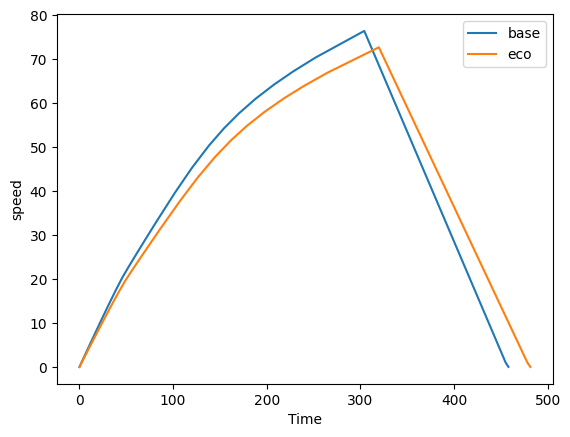

In [57]:
base_speeds = res[0]['base_simulations'][0]['speeds']
eco_speeds = res[0]['eco_simulations'][0]['speeds']
t__base = [dict['time'] for dict in base_speeds]
y__base = [dict['speed'] for dict in base_speeds]
t__eco = [dict['time'] for dict in eco_speeds]
y__eco = [dict['speed'] for dict in eco_speeds]
plt.plot(t__base, y__base, label='base')
plt.plot(t__eco, y__eco, label='eco')
plt.legend()
plt.xlabel('Time')
plt.ylabel('speed')